# Ken Anderson 

## Research question/interests

What airlines are the best and what are the worst at being on-time, cancelled, and customer satisfaction?



- **Also through the other observations we find that american arlines even though they are the highest rated airline we find that they are the worst in most of out data, as they seem to be the best as being late, however due to the ammount of planes that american has flying per day is more than most of the other airlines that alos accounts for this. so a new research question is, within the mean/ average of the airlines what airline is the worst on basis of how many aircraft total they have, thus more airplanes they have the less one delay means as per a value. so if your fleet is smaller a delayed flight would be more substatial. thus is this statment true or does more airplanes within a fleet have a higher likely hood to fail due to the masses.**

- **also an interesting topic is the idea of basis of location are some areas more susetable to delays, persay in the winter is one region of the coast or state more sucetpable to a delay than that of a airport in arizona where the weather is great for the most part. compared to a state like wisconsin in the winter or idaho where the winter months will see more delays**

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd


#sample_data = pd.read_csv('airline.csv')
airlineDatajan2021Dec2021 = pd.read_csv('../data/raw/Airline_Data_Jan2021-Dec2021.csv')
#dfsummed = airlineDatajan2021Dec2021.groupby('carrier')['arr_flights','arr_del15'].sum()
#dfsummed
#we can changes this file above just ensure naming is somewhat descriptive cause this could get messy

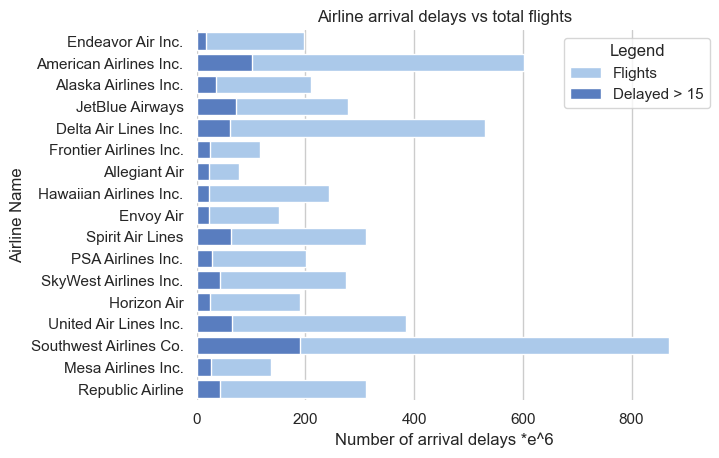

In [4]:
sns.set_theme(style = "whitegrid")
sns.set_color_codes("pastel")
sns.barplot(data = airlineDatajan2021Dec2021, y = 'carrier_name',x = 'arr_flights', color = "b", errorbar=None).set(xlabel = "Number of arrival delays *e^6", title = "Airline arrival delays vs total flights",ylabel = "Airline Name")
sns.set_color_codes("muted")
sns.barplot(data = airlineDatajan2021Dec2021, y = 'carrier_name',x = 'arr_del15', color = "b",errorbar=None).set(xlabel = "Number of arrival delays *e^6",title = "Airline arrival delays vs total flights",ylabel = "Airline Name")
sns.despine(left= True, bottom = True)
labels = ['Flights', 'Delayed > 15']
plt.legend(labels, title = "Legend",bbox_to_anchor = (1.05,1), loc = "best")

In [ ]:
data = pd.read_csv('../data/raw/Airline_Data_Jan2021-Dec2021.csv')
data.dropna(inplace = True)
df = data.drop(['year','month','carrier','carrier_name'],axis = 1)
df.to_csv('../data/raw/MapFile/mapfilefiltered.csv')

PermissionError: [Errno 13] Permission denied: '../data/raw/MapFile/mapfilefiltered.csv'

In [23]:
us_map = gpd.read_file('../data/raw/MapFile/airports.shp')
airlinedatafiltered = pd.read_csv('../data/raw/MapFile/mapfilefiltered.csv')
df = airlinedatafiltered.groupby('airport')['late_aircraft_ct'].sum().reset_index()
us_map = us_map.rename(columns = {'IATA':'airport'})
df
#merge data on common thing so airport code 

,airport,late_aircraft_ct
0,ABE,287.06
1,ABI,87.57
2,ABQ,1400.26
3,ABR,0.00
4,ABY,11.68
...,...,...
366,XNA,465.02
367,XWA,54.00
368,YAK,70.29
369,YKM,41.08


<AxesSubplot:title={'center':'Arrival Delays per Airport'}>

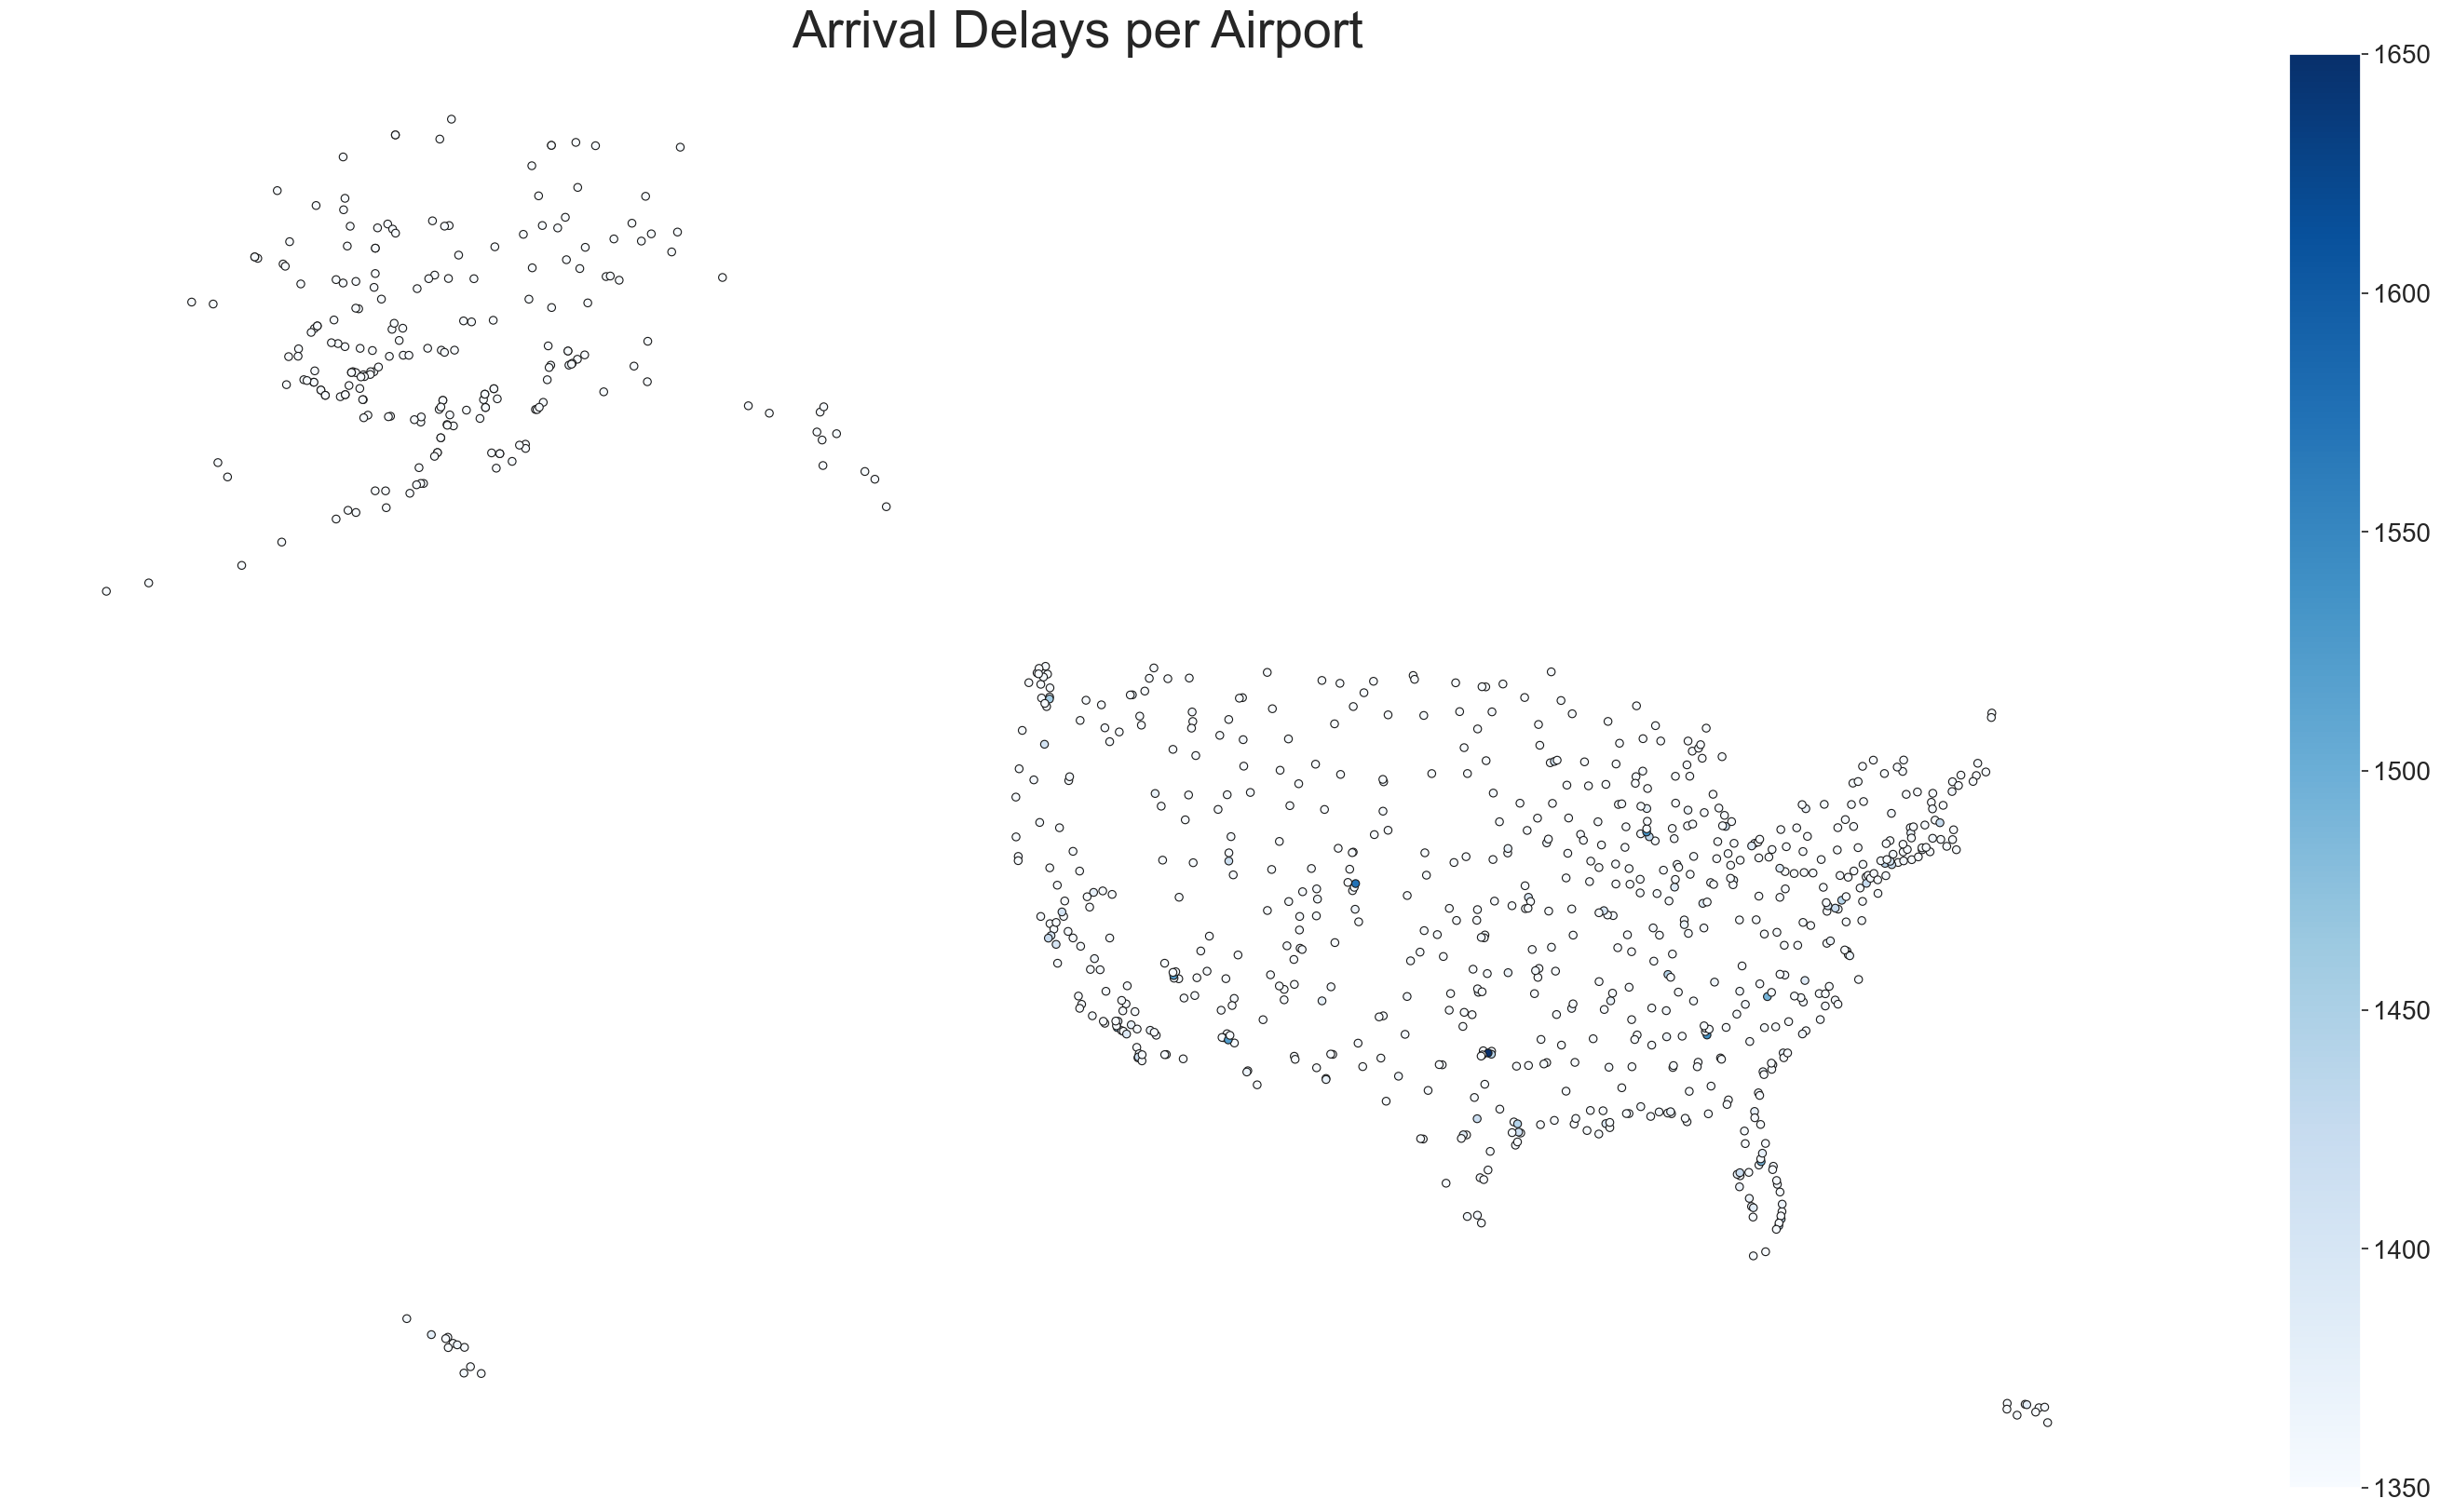

In [54]:
sns.set(style = "darkgrid")
merged = us_map.set_index('airport').join(df.set_index('airport'))
merged = merged.reset_index()
merged = merged.fillna(0)
fig,ax=plt.subplots(1,figsize=(40,20))
ax.axis('off')
ax.set_title('Arrival Delays per Airport',fontdict ={'fontsize': '40', 'fontweight': '3'})
color = 'Blues'
# plot bar size:
vmin,vmax = 0,1500
#dont touch these:
sm = plt.cm.ScalarMappable(cmap = color, norm = plt.Normalize(vmin=vmax, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
#end of dont touch braket
cbar.ax.tick_params(labelsize = 20)
merged.plot('late_aircraft_ct',cmap = color, linewidth=0.8, ax=ax, edgecolor = '0.1',figsize = (40,20))
#save figure option
#fig.savefig('KenMap_export.png',dpi = 300)